In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

### Prepare data and define classification functions

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

def train_rf(merged_df):
    random_state = 2200
    X = merged_df.drop(['crash_likelihood'], axis=1)
    y = merged_df['crash_likelihood']
    # convert y to three levels based on the values
    y = pd.cut(y, bins=[-1, 0.5, 2, 11], labels=['Low', 'Medium', 'High'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

    params = [10, 20, 50, 70, 100, 150, 200]
    criterion = ['entropy', 'log_loss', 'gini']
    accuracy = 0
    for n_est in params:
        for cri in criterion:
            rfc = RandomForestClassifier(n_estimators=n_est, random_state=random_state, criterion=cri)
            rfc.fit(X_train, y_train)

            rfc_pred = rfc.predict(X_test)
            # calculate accuracy
            if np.mean(rfc_pred == y_test) > accuracy:
                accuracy = np.mean(rfc_pred == y_test)
                best_params_est, best_params_cri = n_est, cri

    # rerun the model with the highest accuracy
    rfc = RandomForestClassifier(n_estimators=best_params_est, random_state=random_state, criterion=best_params_cri)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)

    print('n_estimators:', n_est)
    print('Criteria:', best_params_cri)
    print(confusion_matrix(y_test, rfc_pred))
    print(classification_report(y_test, rfc_pred, digits=4))

    # explainer = shap.TreeExplainer(rfc)
    # shap_values = explainer.shap_values(X_test)
    # shap.summary_plot(shap_values, X_test, class_names=rfc.classes_)
    # print(rfc.classes_[0])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 0], X_test)
    # print(rfc.classes_[1])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 1], X_test)
    # print(rfc.classes_[2])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 2], X_test)

    feature_importances = pd.DataFrame(rfc.feature_importances_,
                                        index = X.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
    fig, ax = plt.subplots()
    feature_importances[:20].plot.bar(ax=ax)
    ax.set_title("Feature Importances of Random Forest Model")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    print(feature_importances[:5])
    return y_test, rfc_pred

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

def train_gradient_boosted(merged_df):
    random_state = 2200
    X = merged_df.drop(['crash_likelihood'], axis=1)
    y = merged_df['crash_likelihood']
    # convert y to three levels based on the values
    y = pd.cut(y, bins=[-1, 0.5, 2, 11], labels=['Low', 'Medium', 'High'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

    params = [10, 20, 50, 70, 100, 150, 200]
    criterion = ['squared_error', 'friedman_mse']
    accuracy = 0
    for n_est in params:
        for cri in criterion:
            rfc = GradientBoostingClassifier(n_estimators=n_est, random_state=random_state, criterion=cri)
            rfc.fit(X_train, y_train)

            rfc_pred = rfc.predict(X_test)
            # calculate accuracy
            if np.mean(rfc_pred == y_test) > accuracy:
                accuracy = np.mean(rfc_pred == y_test)
                best_params_est, best_params_cri = n_est, cri

    # rerun the model with the highest accuracy
    rfc = GradientBoostingClassifier(n_estimators=best_params_est, random_state=random_state, criterion=best_params_cri)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)

    print('n_estimators:', n_est)
    print('Criteria:', best_params_cri)
    print(confusion_matrix(y_test, rfc_pred))
    print(classification_report(y_test, rfc_pred, digits=4))

    feature_importances = pd.DataFrame(rfc.feature_importances_,
                                        index = X.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
    fig, ax = plt.subplots()
    feature_importances[:20].plot.bar(ax=ax)
    ax.set_title("Feature Importances of Random Forest Model")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    print(feature_importances[:5])

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

def train_knn(merged_df):
    random_state = 2200
    X = merged_df.drop(['crash_likelihood'], axis=1)
    y = merged_df['crash_likelihood']
    # convert y to three levels based on the values
    y = pd.cut(y, bins=[-1, 0.5, 2, 11], labels=['Low', 'Medium', 'High'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

    params = [5, 10, 20, 50]
    criterion = ['uniform', 'distance']
    accuracy = 0
    for n_est in params:
        for cri in criterion:
            rfc = KNeighborsClassifier(n_neighbors=n_est, weights=cri)
            rfc.fit(X_train, y_train)

            rfc_pred = rfc.predict(X_test.values)
            # calculate accuracy
            if np.mean(rfc_pred == y_test) > accuracy:
                accuracy = np.mean(rfc_pred == y_test)
                best_params_est, best_params_cri = n_est, cri

    # rerun the model with the highest accuracy
    rfc = KNeighborsClassifier(n_neighbors=best_params_est, weights=best_params_cri)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test.values)

    print('n_estimators:', n_est)
    print('Criteria:', best_params_cri)
    print(confusion_matrix(y_test, rfc_pred))
    print(classification_report(y_test, rfc_pred, digits=4))

In [38]:
data = pd.read_csv('../../0_data/1_intermediate_ML/selected_features_one_hot_complexity_32_continuous_demanding_oneformerDriving_crash_mturk.csv')
data.columns

Index(['road', 'vegetation', 'sky', 'car', 'sidewalk', 'building',
       'lead_car_road', 'lead_car_vegetation', 'lead_car_sky', 'lead_car_car',
       'car_count', 'lead_car_car_count', 'image_id', 'weather_cloudy',
       'weather_foggy', 'weather_rainy', 'weather_snowy',
       'traffic_condition_light', 'traffic_condition_moderate',
       'road_condition_icy', 'road_condition_wet', 'visibility_low visibility',
       'time_of_day_dusk/dawn', 'time_of_day_night',
       'road_layout_slight curve', 'road_layout_straight', 'road_type_highway',
       'road_type_parking', 'road_type_residential area',
       'road_type_rural road', 'road_width_narrow', 'road_width_wide', '0',
       '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', 'demanding_level', 'speed',
       'speed_std', 'speed_mean', 'lon_acceleration_mean',
       'lon_acceleration_std

In [39]:
features = {
    'oneformer': ['road', 'vegetation', 'sky', 'car', 'sidewalk', 'building',
       'lead_car_road', 'lead_car_vegetation', 'lead_car_sky', 'lead_car_car',
       'car_count', 'lead_car_car_count'],
    'semantic': ['weather_cloudy',
       'weather_foggy', 'weather_rainy', 'weather_snowy',
       'traffic_condition_light', 'traffic_condition_moderate',
       'road_condition_icy', 'road_condition_wet', 'visibility_low visibility',
       'time_of_day_dusk/dawn', 'time_of_day_night',
       'road_layout_slight curve', 'road_layout_straight', 'road_type_highway',
       'road_type_parking', 'road_type_residential area',
       'road_type_rural road', 'road_width_narrow', 'road_width_wide'],
    'complexity': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31'],
    'index': ['demanding_level'],
    'driving': ['speed', 'speed_std', 'speed_mean',
       'lon_acceleration_mean', 'lon_acceleration_std', 'lon_acceleration_max',
       'lon_acceleration_min', 'speed_deviation',
       'speed_deviation_normalized']
}

In [40]:
del data['image_id']

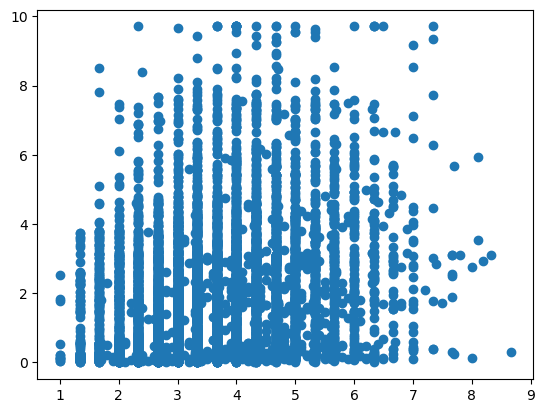

In [8]:
# plot demanding_level and crash likelihood
plt.scatter(data['demanding_level'], data['crash_likelihood'])

### Complexity

n_estimators: 200
Criteria: entropy
[[649  75  79]
 [ 69 638  74]
 [165 107 300]]
              precision    recall  f1-score   support

        High     0.7350    0.8082    0.7699       803
         Low     0.7780    0.8169    0.7970       781
      Medium     0.6623    0.5245    0.5854       572

    accuracy                         0.7361      2156
   macro avg     0.7251    0.7165    0.7174      2156
weighted avg     0.7313    0.7361    0.7307      2156

    importance
21    0.088359
0     0.056630
27    0.050502
11    0.049322
8     0.048376


(290       High
 7042    Medium
 2274       Low
 8537    Medium
 5450      High
          ...  
 2507       Low
 175       High
 1857    Medium
 8591      High
 1061       Low
 Name: crash_likelihood, Length: 2156, dtype: category
 Categories (3, object): ['Low' < 'Medium' < 'High'],
 array(['Medium', 'Low', 'Low', ..., 'Medium', 'High', 'Medium'],
       dtype=object))

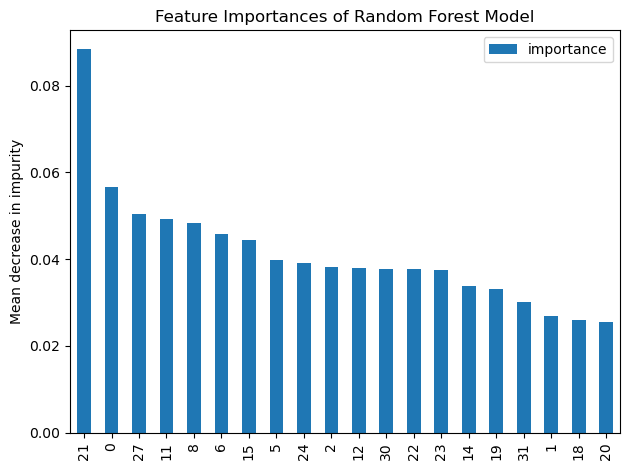

In [41]:
train_rf(data[features['complexity'] + ['crash_likelihood']])

n_estimators: 200
Criteria: friedman_mse
[[595 102 106]
 [ 82 598 101]
 [211 131 230]]
              precision    recall  f1-score   support

        High     0.6700    0.7410    0.7037       803
         Low     0.7196    0.7657    0.7419       781
      Medium     0.5263    0.4021    0.4559       572

    accuracy                         0.6600      2156
   macro avg     0.6387    0.6363    0.6339      2156
weighted avg     0.6499    0.6600    0.6518      2156

    importance
21    0.212889
5     0.096219
0     0.063191
11    0.055643
2     0.047420


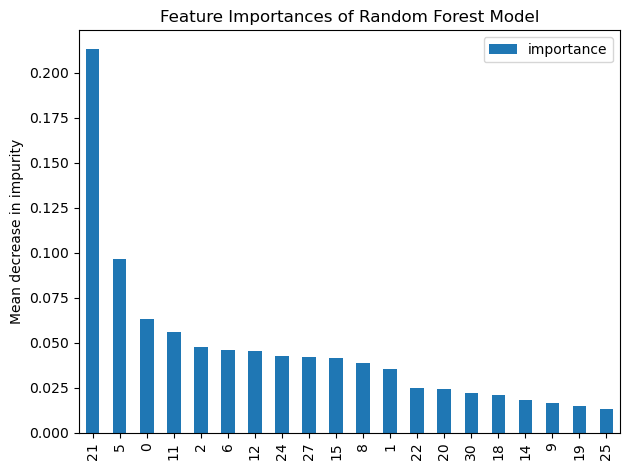

In [42]:
train_gradient_boosted(data[features['complexity'] + ['crash_likelihood']])

In [43]:
train_knn(data[features['complexity'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[639  64 100]
 [ 68 629  84]
 [155  88 329]]
              precision    recall  f1-score   support

        High     0.7413    0.7958    0.7676       803
         Low     0.8054    0.8054    0.8054       781
      Medium     0.6413    0.5752    0.6065       572

    accuracy                         0.7407      2156
   macro avg     0.7293    0.7254    0.7265      2156
weighted avg     0.7380    0.7407    0.7385      2156



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Oneformer + index

n_estimators: 200
Criteria: entropy
[[620  94  89]
 [ 54 655  72]
 [155 149 268]]
              precision    recall  f1-score   support

        High     0.7479    0.7721    0.7598       803
         Low     0.7294    0.8387    0.7802       781
      Medium     0.6247    0.4685    0.5355       572

    accuracy                         0.7157      2156
   macro avg     0.7007    0.6931    0.6918      2156
weighted avg     0.7085    0.7157    0.7077      2156

                     importance
vegetation             0.139233
lead_car_vegetation    0.139202
sky                    0.092750
lead_car_sky           0.092324
lead_car_road          0.084675


(290       High
 7042    Medium
 2274       Low
 8537    Medium
 5450      High
          ...  
 2507       Low
 175       High
 1857    Medium
 8591      High
 1061       Low
 Name: crash_likelihood, Length: 2156, dtype: category
 Categories (3, object): ['Low' < 'Medium' < 'High'],
 array(['High', 'Low', 'Low', ..., 'Medium', 'High', 'Medium'],
       dtype=object))

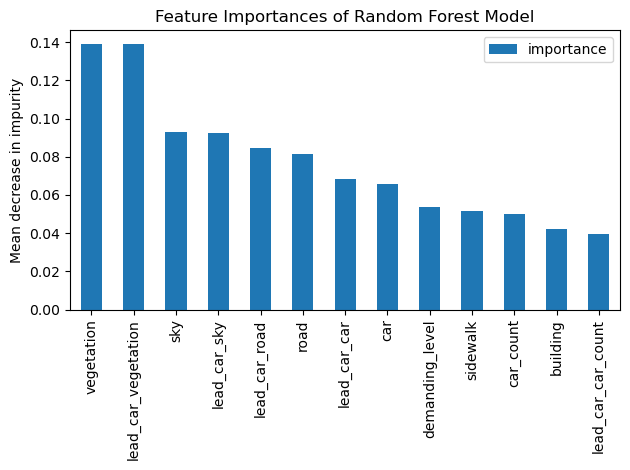

In [32]:
train_rf(data[features['oneformer'] + features['index'] + ['crash_likelihood']])

n_estimators: 200
Criteria: friedman_mse
[[557 105 141]
 [ 73 616  92]
 [170 160 242]]
              precision    recall  f1-score   support

        High     0.6963    0.6936    0.6949       803
         Low     0.6992    0.7887    0.7413       781
      Medium     0.5095    0.4231    0.4623       572

    accuracy                         0.6563      2156
   macro avg     0.6350    0.6352    0.6328      2156
weighted avg     0.6478    0.6563    0.6500      2156

                     importance
vegetation             0.325924
lead_car_vegetation    0.217231
lead_car_sky           0.077188
sidewalk               0.060623
lead_car_road          0.055825


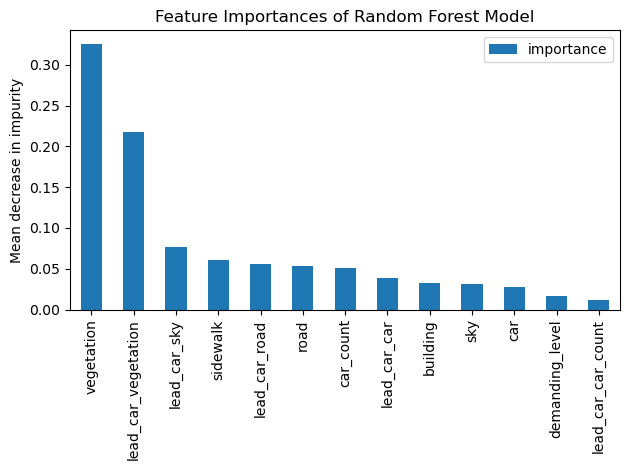

In [33]:
train_gradient_boosted(data[features['oneformer'] + features['index'] + ['crash_likelihood']])

In [34]:
train_knn(data[features['oneformer'] + features['index'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[534 133 136]
 [ 77 593 111]
 [190 167 215]]
              precision    recall  f1-score   support

        High     0.6667    0.6650    0.6658       803
         Low     0.6641    0.7593    0.7085       781
      Medium     0.4654    0.3759    0.4159       572

    accuracy                         0.6224      2156
   macro avg     0.5987    0.6001    0.5967      2156
weighted avg     0.6123    0.6224    0.6150      2156



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Oneformer + semantic

n_estimators: 200
Criteria: entropy
[[777  78  98]
 [ 58 784  57]
 [158 115 422]]
              precision    recall  f1-score   support

        High       0.78      0.82      0.80       953
         Low       0.80      0.87      0.84       899
      Medium       0.73      0.61      0.66       695

    accuracy                           0.78      2547
   macro avg       0.77      0.76      0.77      2547
weighted avg       0.78      0.78      0.77      2547

                     importance
vegetation             0.129400
lead_car_vegetation    0.116773
sky                    0.086444
lead_car_sky           0.083979
lead_car_road          0.072364


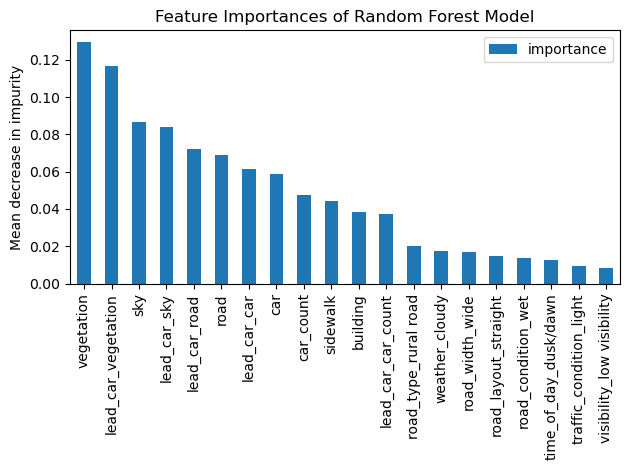

In [11]:
train_rf(data[features['oneformer'] + features['semantic'] + ['crash_likelihood']])

n_estimators: 200
Criteria: squared_error
[[714  86 153]
 [ 64 721 114]
 [203 155 337]]
              precision    recall  f1-score   support

        High       0.73      0.75      0.74       953
         Low       0.75      0.80      0.77       899
      Medium       0.56      0.48      0.52       695

    accuracy                           0.70      2547
   macro avg       0.68      0.68      0.68      2547
weighted avg       0.69      0.70      0.69      2547

                      importance
lead_car_vegetation     0.310394
vegetation              0.181558
lead_car_sky            0.055316
car_count               0.042385
road_type_rural road    0.039864


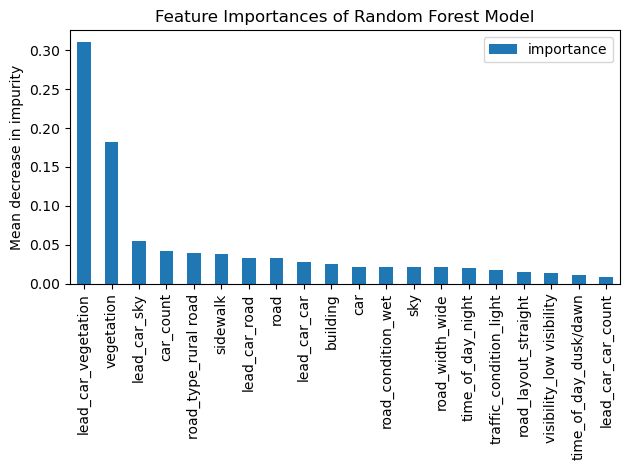

In [12]:
train_gradient_boosted(data[features['oneformer'] + features['semantic'] + ['crash_likelihood']])

In [13]:
train_knn(data[features['oneformer'] + features['semantic'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[711  70 172]
 [ 75 729  95]
 [165 127 403]]
              precision    recall  f1-score   support

        High       0.75      0.75      0.75       953
         Low       0.79      0.81      0.80       899
      Medium       0.60      0.58      0.59       695

    accuracy                           0.72      2547
   macro avg       0.71      0.71      0.71      2547
weighted avg       0.72      0.72      0.72      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Oneformer + semantic + complexity

n_estimators: 200
Criteria: gini
[[845  64  44]
 [ 35 816  48]
 [144  62 489]]
              precision    recall  f1-score   support

        High       0.83      0.89      0.85       953
         Low       0.87      0.91      0.89       899
      Medium       0.84      0.70      0.77       695

    accuracy                           0.84      2547
   macro avg       0.84      0.83      0.84      2547
weighted avg       0.84      0.84      0.84      2547

                     importance
vegetation             0.077884
lead_car_vegetation    0.074324
sky                    0.037045
lead_car_sky           0.035835
lead_car_road          0.025378


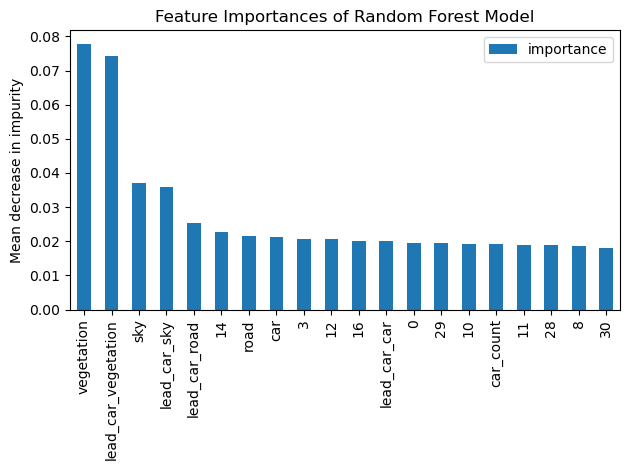

In [14]:
train_rf(data[features['oneformer'] + features['semantic'] + features['complexity'] + ['crash_likelihood']])

n_estimators: 200
Criteria: squared_error
[[756  67 130]
 [ 63 751  85]
 [196 107 392]]
              precision    recall  f1-score   support

        High       0.74      0.79      0.77       953
         Low       0.81      0.84      0.82       899
      Medium       0.65      0.56      0.60       695

    accuracy                           0.75      2547
   macro avg       0.73      0.73      0.73      2547
weighted avg       0.74      0.75      0.74      2547

                      importance
lead_car_vegetation     0.244358
vegetation              0.137284
road_type_rural road    0.034254
lead_car_sky            0.030383
car_count               0.028615


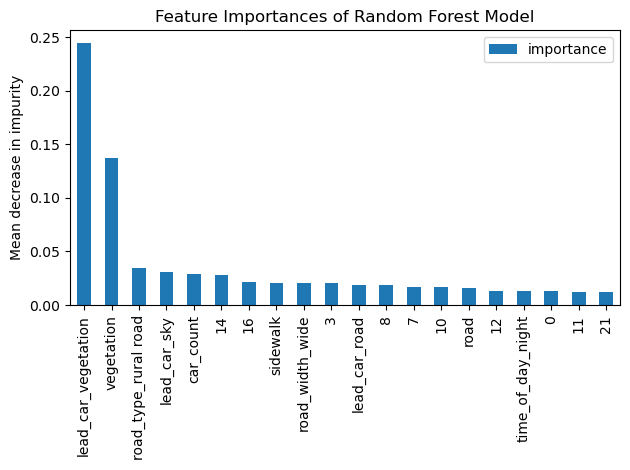

In [15]:
train_gradient_boosted(data[features['oneformer'] + features['semantic'] + features['complexity'] + ['crash_likelihood']])

In [16]:
train_knn(data[features['oneformer'] + features['semantic'] + features['complexity'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[757  64 132]
 [ 61 777  61]
 [118  85 492]]
              precision    recall  f1-score   support

        High       0.81      0.79      0.80       953
         Low       0.84      0.86      0.85       899
      Medium       0.72      0.71      0.71       695

    accuracy                           0.80      2547
   macro avg       0.79      0.79      0.79      2547
weighted avg       0.79      0.80      0.80      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Oneformer + complexity

n_estimators: 200
Criteria: entropy
[[620  94  89]
 [ 54 651  76]
 [159 153 260]]
              precision    recall  f1-score   support

        High     0.7443    0.7721    0.7579       803
         Low     0.7249    0.8335    0.7755       781
      Medium     0.6118    0.4545    0.5216       572

    accuracy                         0.7101      2156
   macro avg     0.6937    0.6867    0.6850      2156
weighted avg     0.7021    0.7101    0.7016      2156

                     importance
vegetation             0.064674
lead_car_vegetation    0.062577
10                     0.042376
22                     0.042100
18                     0.041744


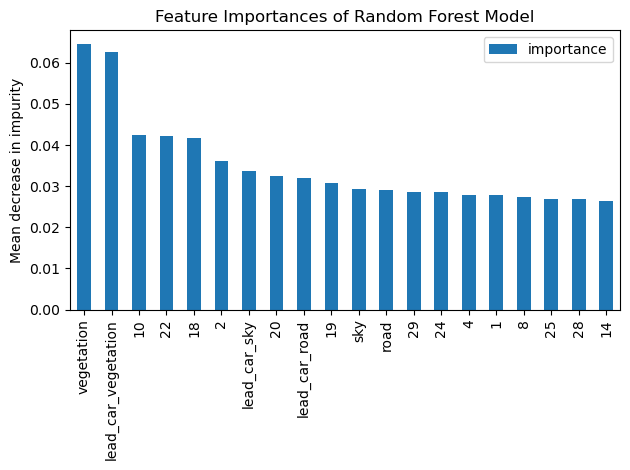

In [35]:
y_test, y_pred = train_rf(data[features['oneformer'] + features['complexity'] + ['crash_likelihood']])
y_test.to_csv('y_test_complexity_oneformer_mturk.csv')
pd.DataFrame(y_pred, columns=['crash_pred']).to_csv('y_pred_complexity_oneformer_mturk.csv')

n_estimators: 200
Criteria: squared_error
[[571 105 127]
 [ 67 624  90]
 [175 170 227]]
              precision    recall  f1-score   support

        High     0.7023    0.7111    0.7067       803
         Low     0.6941    0.7990    0.7429       781
      Medium     0.5113    0.3969    0.4469       572

    accuracy                         0.6596      2156
   macro avg     0.6359    0.6356    0.6321      2156
weighted avg     0.6487    0.6596    0.6509      2156

                     importance
vegetation             0.254596
lead_car_vegetation    0.216808
sidewalk               0.044662
10                     0.033314
lead_car_sky           0.031047


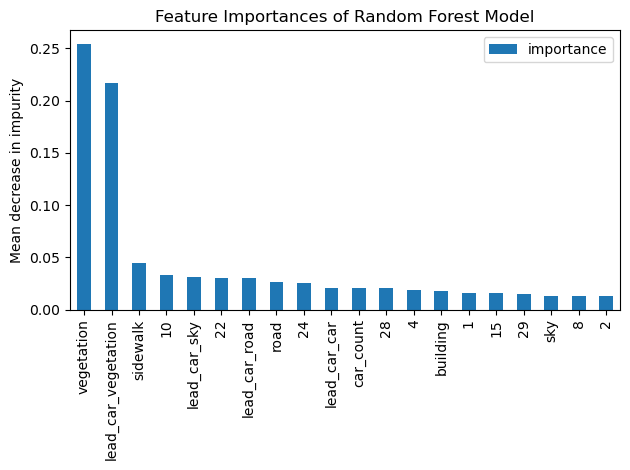

In [36]:
train_gradient_boosted(data[features['oneformer'] + features['complexity'] + ['crash_likelihood']])

In [37]:
train_knn(data[features['oneformer'] + features['complexity'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[537 132 134]
 [ 74 612  95]
 [178 178 216]]
              precision    recall  f1-score   support

        High     0.6806    0.6687    0.6746       803
         Low     0.6638    0.7836    0.7187       781
      Medium     0.4854    0.3776    0.4248       572

    accuracy                         0.6331      2156
   macro avg     0.6099    0.6100    0.6060      2156
weighted avg     0.6227    0.6331    0.6243      2156



### Oneformer + driving + complexity

n_estimators: 200
Criteria: gini
[[693  47  63]
 [ 39 696  46]
 [121  96 355]]
              precision    recall  f1-score   support

        High     0.8124    0.8630    0.8370       803
         Low     0.8296    0.8912    0.8593       781
      Medium     0.7651    0.6206    0.6853       572

    accuracy                         0.8089      2156
   macro avg     0.8024    0.7916    0.7938      2156
weighted avg     0.8061    0.8089    0.8048      2156

                     importance
lead_car_vegetation    0.075410
vegetation             0.075102
lead_car_sky           0.038630
sky                    0.038491
speed_mean             0.032616


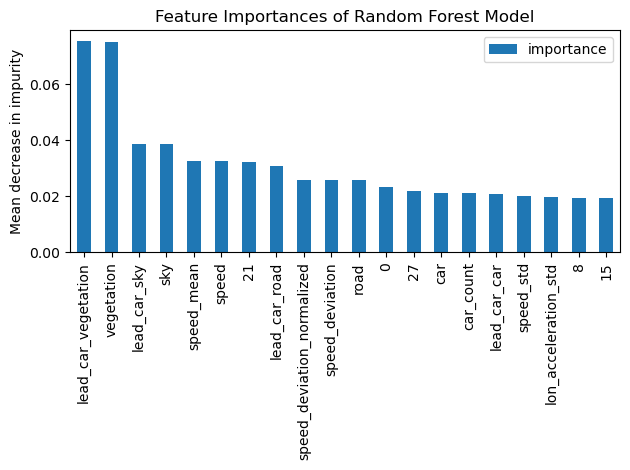

In [44]:
train_rf(data[features['oneformer'] + features['complexity'] + features['driving'] + ['crash_likelihood']])
y_test.to_csv('y_test_oneformer_driving_complexity_oneformer_mturk.csv')
pd.DataFrame(y_pred, columns=['crash_pred']).to_csv('y_pred_oneformer_driving_complexity_oneformer_mturk.csv')

n_estimators: 200
Criteria: squared_error
[[647  68  88]
 [ 48 661  72]
 [149 129 294]]
              precision    recall  f1-score   support

        High     0.7666    0.8057    0.7857       803
         Low     0.7704    0.8464    0.8066       781
      Medium     0.6476    0.5140    0.5731       572

    accuracy                         0.7430      2156
   macro avg     0.7282    0.7220    0.7218      2156
weighted avg     0.7364    0.7430    0.7369      2156

                     importance
vegetation             0.198111
lead_car_vegetation    0.174349
speed_mean             0.052237
speed_deviation        0.040911
car_count              0.033591


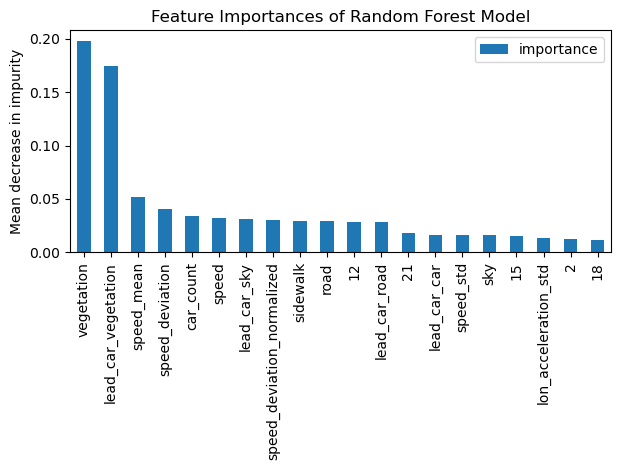

In [45]:
train_gradient_boosted(data[features['oneformer'] + features['complexity'] + features['driving'] + ['crash_likelihood']])

In [46]:
train_knn(data[features['oneformer'] + features['complexity'] + features['driving'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[573  99 131]
 [ 51 640  90]
 [127 133 312]]
              precision    recall  f1-score   support

        High     0.7630    0.7136    0.7375       803
         Low     0.7339    0.8195    0.7743       781
      Medium     0.5854    0.5455    0.5647       572

    accuracy                         0.7073      2156
   macro avg     0.6941    0.6928    0.6922      2156
weighted avg     0.7053    0.7073    0.7050      2156



### Oneformer + driving + semantic

n_estimators: 200
Criteria: entropy
[[ 226   18   80]
 [   0 1074   87]
 [  21  111  930]]
              precision    recall  f1-score   support

        High       0.91      0.70      0.79       324
         Low       0.89      0.93      0.91      1161
      Medium       0.85      0.88      0.86      1062

    accuracy                           0.88      2547
   macro avg       0.89      0.83      0.85      2547
weighted avg       0.88      0.88      0.87      2547

                     importance
vegetation             0.097343
lead_car_vegetation    0.085132
speed_mean             0.066445
speed                  0.064490
sky                    0.054454


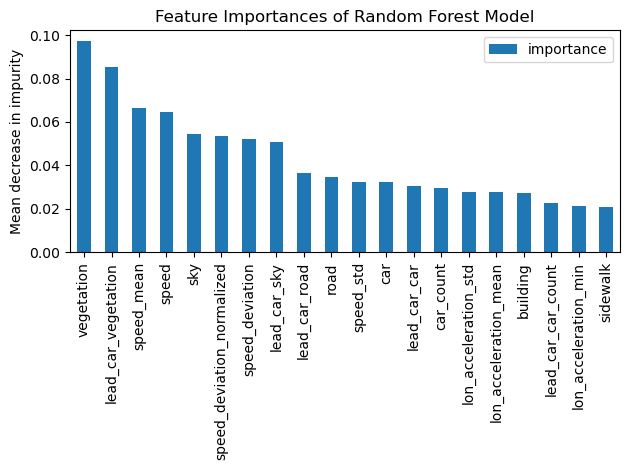

In [32]:
y_test, y_pred = train_rf(data[features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])
y_test.to_csv('y_test_semantic_driving_oneformer.csv')
pd.DataFrame(y_pred, columns=['crash_pred']).to_csv('y_pred_semantic_driving_oneformer.csv')

n_estimators: 200
Criteria: squared_error
[[191  23 110]
 [  2 996 163]
 [ 49 163 850]]
              precision    recall  f1-score   support

        High       0.79      0.59      0.67       324
         Low       0.84      0.86      0.85      1161
      Medium       0.76      0.80      0.78      1062

    accuracy                           0.80      2547
   macro avg       0.80      0.75      0.77      2547
weighted avg       0.80      0.80      0.80      2547

                     importance
vegetation             0.273087
lead_car_vegetation    0.114398
speed_mean             0.062415
speed_deviation        0.062207
speed                  0.055702


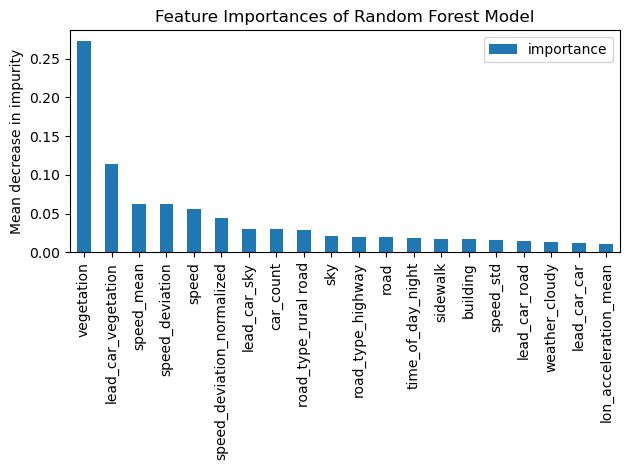

In [33]:
train_gradient_boosted(data[features['index'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])

In [34]:
train_knn(data[features['index'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[ 211   22   91]
 [   8 1003  150]
 [  55  154  853]]
              precision    recall  f1-score   support

        High       0.77      0.65      0.71       324
         Low       0.85      0.86      0.86      1161
      Medium       0.78      0.80      0.79      1062

    accuracy                           0.81      2547
   macro avg       0.80      0.77      0.78      2547
weighted avg       0.81      0.81      0.81      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Oneformer + driving + semantic + index

n_estimators: 200
Criteria: entropy
[[729  26  48]
 [ 18 726  37]
 [ 94  63 415]]
              precision    recall  f1-score   support

        High     0.8668    0.9078    0.8869       803
         Low     0.8908    0.9296    0.9098       781
      Medium     0.8300    0.7255    0.7743       572

    accuracy                         0.8673      2156
   macro avg     0.8625    0.8543    0.8570      2156
weighted avg     0.8657    0.8673    0.8653      2156

                     importance
vegetation             0.097789
lead_car_vegetation    0.083743
speed_mean             0.057236
lead_car_sky           0.055128
speed                  0.054427


(290       High
 7042    Medium
 2274       Low
 8537    Medium
 5450      High
          ...  
 2507       Low
 175       High
 1857    Medium
 8591      High
 1061       Low
 Name: crash_likelihood, Length: 2156, dtype: category
 Categories (3, object): ['Low' < 'Medium' < 'High'],
 array(['High', 'Low', 'Low', ..., 'Medium', 'High', 'Medium'],
       dtype=object))

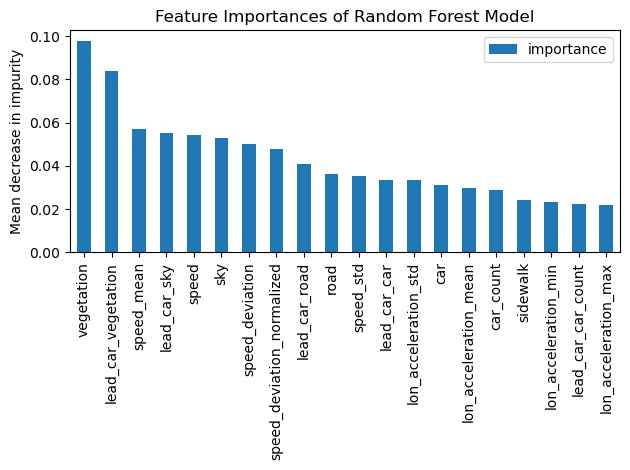

In [20]:
train_rf(data[features['index'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])

n_estimators: 200
Criteria: squared_error
[[666  49  88]
 [ 36 676  69]
 [143  98 331]]
              precision    recall  f1-score   support

        High     0.7882    0.8294    0.8083       803
         Low     0.8214    0.8656    0.8429       781
      Medium     0.6783    0.5787    0.6245       572

    accuracy                         0.7760      2156
   macro avg     0.7626    0.7579    0.7586      2156
weighted avg     0.7710    0.7760    0.7721      2156

                     importance
vegetation             0.214095
lead_car_vegetation    0.148083
speed_mean             0.070689
speed_deviation        0.062205
speed                  0.061147


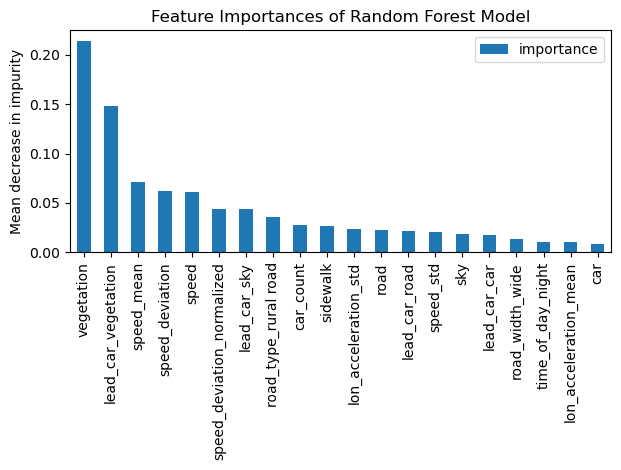

In [21]:
train_gradient_boosted(data[features['index'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])

In [22]:
train_knn(data[features['index'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[639  51 113]
 [ 50 651  80]
 [125  74 373]]
              precision    recall  f1-score   support

        High     0.7850    0.7958    0.7904       803
         Low     0.8389    0.8335    0.8362       781
      Medium     0.6590    0.6521    0.6555       572

    accuracy                         0.7713      2156
   macro avg     0.7610    0.7605    0.7607      2156
weighted avg     0.7711    0.7713    0.7712      2156



### All features

n_estimators: 200
Criteria: entropy
[[728  32  43]
 [ 20 726  35]
 [101  58 413]]
              precision    recall  f1-score   support

        High     0.8575    0.9066    0.8814       803
         Low     0.8897    0.9296    0.9092       781
      Medium     0.8411    0.7220    0.7770       572

    accuracy                         0.8660      2156
   macro avg     0.8628    0.8527    0.8559      2156
weighted avg     0.8648    0.8660    0.8638      2156

                     importance
lead_car_vegetation    0.073312
vegetation             0.068468
lead_car_sky           0.039695
sky                    0.036573
speed_mean             0.035653


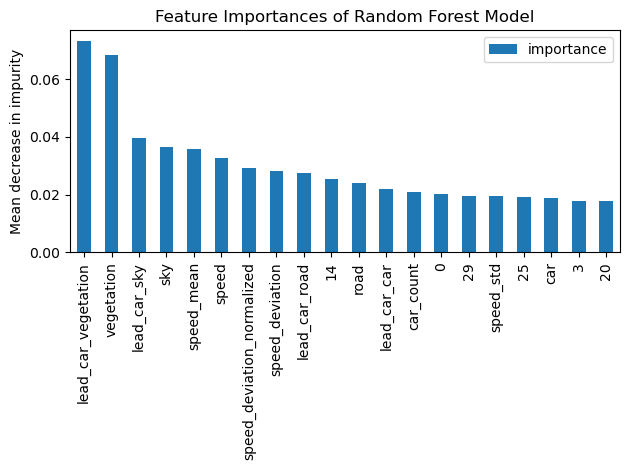

In [17]:
y_test, y_pred = train_rf(data[features['complexity'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])
# save y_test and y_pred
y_test.to_csv('y_test_complexity_semantic_driving_oneformer_mturk.csv')
pd.DataFrame(y_pred, columns=['crash_pred']).to_csv('y_pred_complexity_semantic_driving_oneformer_mturk.csv')

n_estimators: 200
Criteria: squared_error
[[667  52  84]
 [ 30 679  72]
 [144  94 334]]
              precision    recall  f1-score   support

        High     0.7931    0.8306    0.8114       803
         Low     0.8230    0.8694    0.8456       781
      Medium     0.6816    0.5839    0.6290       572

    accuracy                         0.7792      2156
   macro avg     0.7659    0.7613    0.7620      2156
weighted avg     0.7744    0.7792    0.7754      2156

                     importance
vegetation             0.206525
lead_car_vegetation    0.134725
speed_mean             0.048847
speed_deviation        0.041612
speed                  0.033246


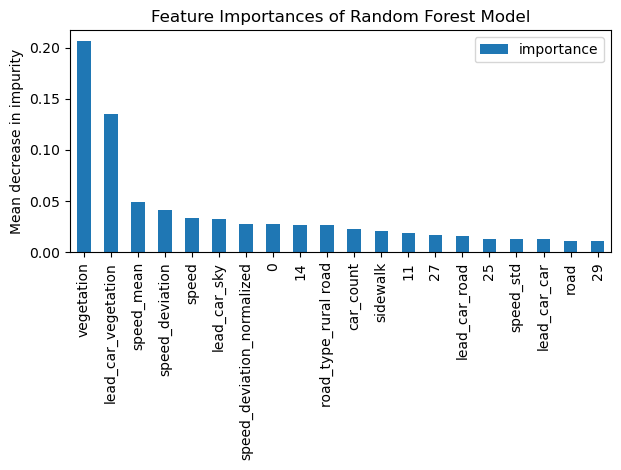

In [18]:
train_gradient_boosted(data[features['complexity'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])

In [19]:
train_knn(data[features['complexity'] + features['semantic'] + features['driving'] + features['oneformer'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[652  47 104]
 [ 46 664  71]
 [114  66 392]]
              precision    recall  f1-score   support

        High     0.8030    0.8120    0.8074       803
         Low     0.8546    0.8502    0.8524       781
      Medium     0.6914    0.6853    0.6883       572

    accuracy                         0.7922      2156
   macro avg     0.7830    0.7825    0.7827      2156
weighted avg     0.7920    0.7922    0.7921      2156



### Oneformer

n_estimators: 200
Criteria: entropy
[[127  34 163]
 [  4 948 209]
 [ 35 233 794]]
              precision    recall  f1-score   support

        High       0.77      0.39      0.52       324
         Low       0.78      0.82      0.80      1161
      Medium       0.68      0.75      0.71      1062

    accuracy                           0.73      2547
   macro avg       0.74      0.65      0.68      2547
weighted avg       0.74      0.73      0.73      2547

                     importance
vegetation             0.152496
lead_car_vegetation    0.140946
sky                    0.101111
lead_car_sky           0.092007
lead_car_road          0.087174


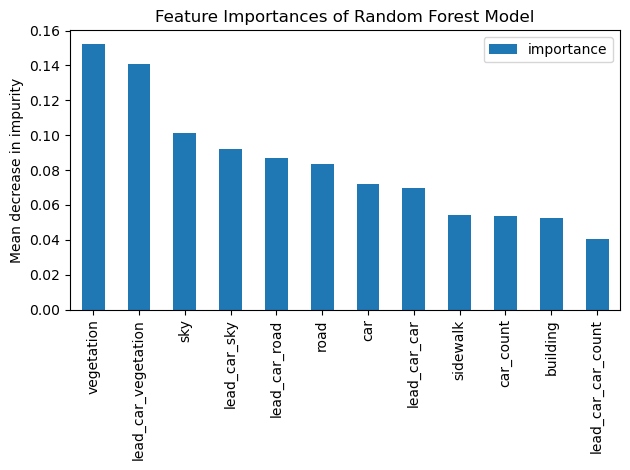

In [45]:
y_test, y_pred = train_rf(data[features['oneformer'] + ['crash_likelihood']])
# y_test.to_csv('y_test_oneformer.csv')
# pd.DataFrame(y_pred, columns=['crash_pred']).to_csv('y_pred_oneformer.csv')

n_estimators: 200
Criteria: squared_error
[[116  48 160]
 [  5 876 280]
 [ 55 274 733]]
              precision    recall  f1-score   support

        High       0.66      0.36      0.46       324
         Low       0.73      0.75      0.74      1161
      Medium       0.62      0.69      0.66      1062

    accuracy                           0.68      2547
   macro avg       0.67      0.60      0.62      2547
weighted avg       0.68      0.68      0.67      2547

                     importance
vegetation             0.413824
lead_car_vegetation    0.140012
lead_car_sky           0.066965
road                   0.059731
sidewalk               0.051131


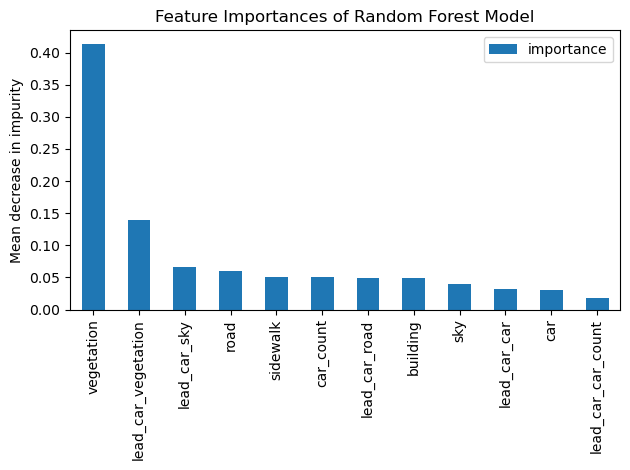

In [36]:
train_gradient_boosted(data[features['oneformer'] + ['crash_likelihood']])

In [37]:
train_knn(data[features['oneformer'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[120  54 150]
 [ 24 899 238]
 [ 75 322 665]]
              precision    recall  f1-score   support

        High       0.55      0.37      0.44       324
         Low       0.71      0.77      0.74      1161
      Medium       0.63      0.63      0.63      1062

    accuracy                           0.66      2547
   macro avg       0.63      0.59      0.60      2547
weighted avg       0.65      0.66      0.65      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Semantic

n_estimators: 200
Criteria: entropy
[[807  95  51]
 [340 520  39]
 [449 128 118]]
              precision    recall  f1-score   support

        High       0.51      0.85      0.63       953
         Low       0.70      0.58      0.63       899
      Medium       0.57      0.17      0.26       695

    accuracy                           0.57      2547
   macro avg       0.59      0.53      0.51      2547
weighted avg       0.59      0.57      0.53      2547

                       importance
road_type_rural road     0.136251
road_width_wide          0.102273
time_of_day_dusk/dawn    0.092518
road_condition_wet       0.089753
road_layout_straight     0.089252


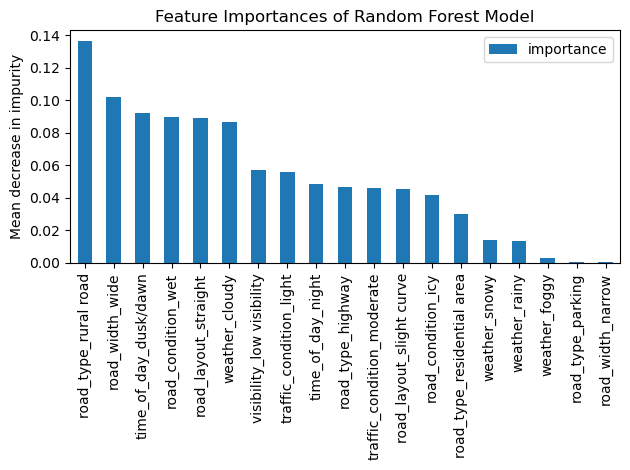

In [30]:
train_rf(data[features['semantic'] + ['crash_likelihood']])

n_estimators: 200
Criteria: squared_error
[[825  92  36]
 [380 491  28]
 [472 129  94]]
              precision    recall  f1-score   support

        High       0.49      0.87      0.63       953
         Low       0.69      0.55      0.61       899
      Medium       0.59      0.14      0.22       695

    accuracy                           0.55      2547
   macro avg       0.59      0.52      0.49      2547
weighted avg       0.59      0.55      0.51      2547

                           importance
road_type_rural road         0.262733
road_width_wide              0.090683
road_condition_wet           0.078237
visibility_low visibility    0.073166
weather_cloudy               0.072199


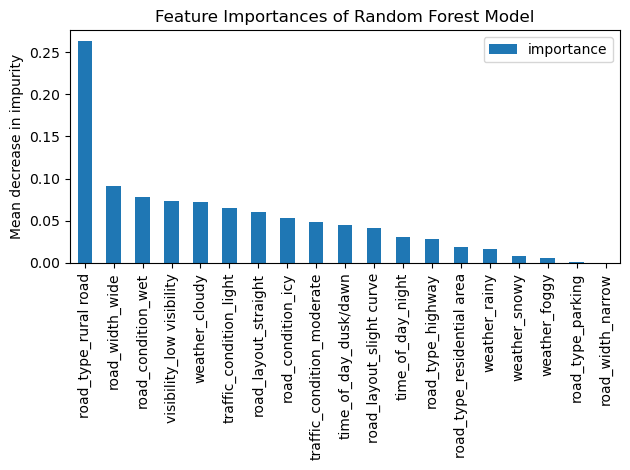

In [31]:
train_gradient_boosted(data[features['semantic'] + ['crash_likelihood']])

In [32]:
train_knn(data[features['semantic'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[663 239  51]
 [236 624  39]
 [334 243 118]]
              precision    recall  f1-score   support

        High       0.54      0.70      0.61       953
         Low       0.56      0.69      0.62       899
      Medium       0.57      0.17      0.26       695

    accuracy                           0.55      2547
   macro avg       0.56      0.52      0.50      2547
weighted avg       0.56      0.55      0.52      2547



### Driving

n_estimators: 200
Criteria: gini
[[679 134 140]
 [141 616 142]
 [214 148 333]]
              precision    recall  f1-score   support

        High       0.66      0.71      0.68       953
         Low       0.69      0.69      0.69       899
      Medium       0.54      0.48      0.51       695

    accuracy                           0.64      2547
   macro avg       0.63      0.63      0.63      2547
weighted avg       0.64      0.64      0.64      2547

                            importance
speed_mean                    0.148928
speed                         0.134165
speed_deviation               0.130733
speed_deviation_normalized    0.130321
speed_std                     0.114721


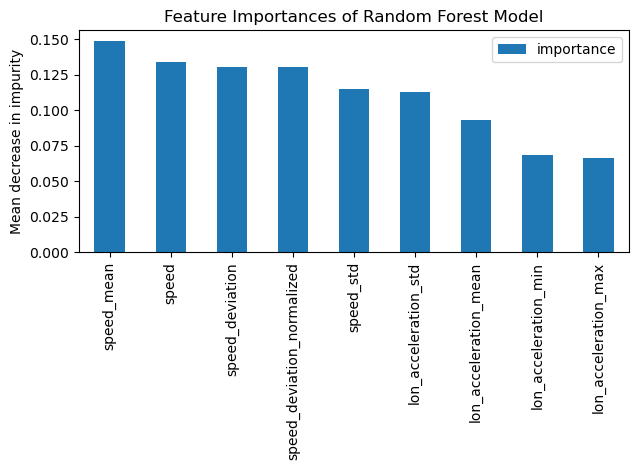

In [33]:
train_rf(data[features['driving'] + ['crash_likelihood']])

n_estimators: 200
Criteria: squared_error
[[621 174 158]
 [182 567 150]
 [219 183 293]]
              precision    recall  f1-score   support

        High       0.61      0.65      0.63       953
         Low       0.61      0.63      0.62       899
      Medium       0.49      0.42      0.45       695

    accuracy                           0.58      2547
   macro avg       0.57      0.57      0.57      2547
weighted avg       0.58      0.58      0.58      2547

                            importance
speed_deviation               0.201549
speed_mean                    0.186401
speed                         0.169355
speed_deviation_normalized    0.165730
lon_acceleration_std          0.087318


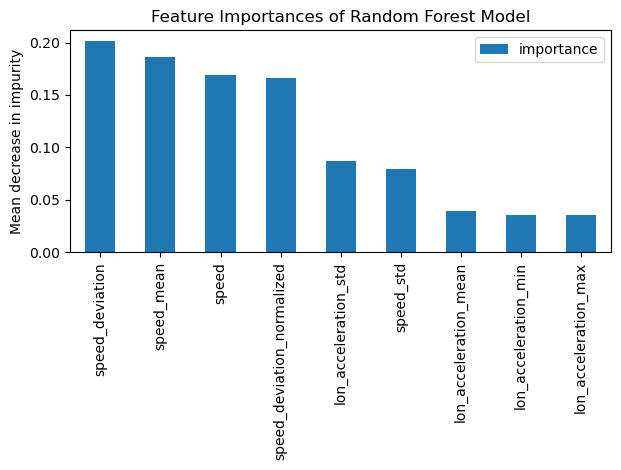

In [34]:
train_gradient_boosted(data[features['driving'] + ['crash_likelihood']])

In [35]:
train_knn(data[features['driving'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[640 170 143]
 [161 580 158]
 [219 170 306]]
              precision    recall  f1-score   support

        High       0.63      0.67      0.65       953
         Low       0.63      0.65      0.64       899
      Medium       0.50      0.44      0.47       695

    accuracy                           0.60      2547
   macro avg       0.59      0.59      0.59      2547
weighted avg       0.59      0.60      0.60      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Oneformer + driving

n_estimators: 200
Criteria: entropy
[[ 193   30  101]
 [   3 1043  115]
 [  29  138  895]]
              precision    recall  f1-score   support

        High       0.86      0.60      0.70       324
         Low       0.86      0.90      0.88      1161
      Medium       0.81      0.84      0.82      1062

    accuracy                           0.84      2547
   macro avg       0.84      0.78      0.80      2547
weighted avg       0.84      0.84      0.83      2547

                     importance
vegetation             0.103797
lead_car_vegetation    0.096999
speed_mean             0.077564
speed                  0.069916
sky                    0.062746


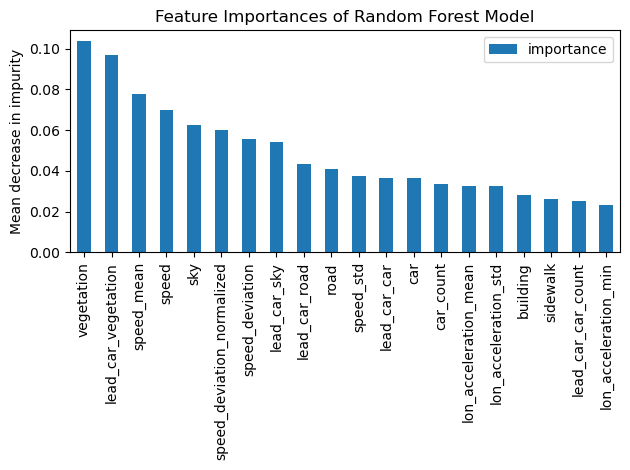

In [38]:
y_test, y_pred = train_rf(data[features['oneformer'] + features['driving'] + ['crash_likelihood']])
y_test.to_csv('y_test_driving_oneformer.csv')
pd.DataFrame(y_pred, columns=['crash_pred']).to_csv('y_pred_driving_oneformer.csv')

n_estimators: 200
Criteria: squared_error
[[154  33 137]
 [  4 975 182]
 [ 74 216 772]]
              precision    recall  f1-score   support

        High       0.66      0.48      0.55       324
         Low       0.80      0.84      0.82      1161
      Medium       0.71      0.73      0.72      1062

    accuracy                           0.75      2547
   macro avg       0.72      0.68      0.70      2547
weighted avg       0.74      0.75      0.74      2547

                     importance
vegetation             0.295098
lead_car_vegetation    0.127283
speed_deviation        0.072657
speed_mean             0.063377
speed                  0.062678


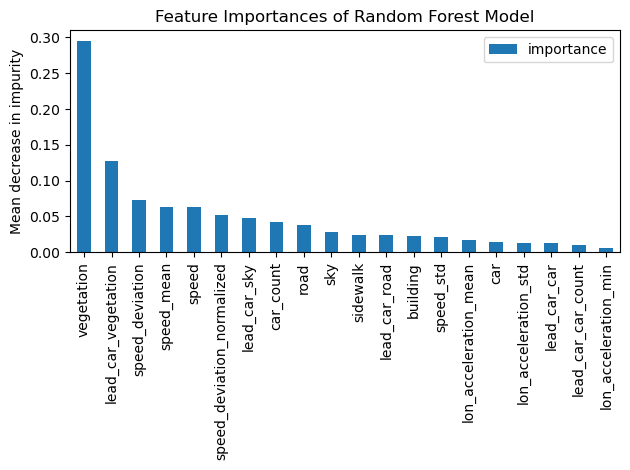

In [39]:
train_gradient_boosted(data[features['oneformer'] + features['driving'] + ['crash_likelihood']])

In [40]:
train_knn(data[features['oneformer'] + features['driving'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[168  40 116]
 [ 16 944 201]
 [ 58 243 761]]
              precision    recall  f1-score   support

        High       0.69      0.52      0.59       324
         Low       0.77      0.81      0.79      1161
      Medium       0.71      0.72      0.71      1062

    accuracy                           0.74      2547
   macro avg       0.72      0.68      0.70      2547
weighted avg       0.73      0.74      0.73      2547



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Oneformer + driving + index

n_estimators: 200
Criteria: gini
[[697  48  58]
 [ 34 695  52]
 [111  93 368]]
              precision    recall  f1-score   support

        High     0.8278    0.8680    0.8474       803
         Low     0.8313    0.8899    0.8596       781
      Medium     0.7699    0.6434    0.7010       572

    accuracy                         0.8163      2156
   macro avg     0.8097    0.8004    0.8027      2156
weighted avg     0.8137    0.8163    0.8130      2156

                     importance
vegetation             0.105412
lead_car_vegetation    0.094870
speed_mean             0.062138
sky                    0.060827
speed                  0.058539


(290       High
 7042    Medium
 2274       Low
 8537    Medium
 5450      High
          ...  
 2507       Low
 175       High
 1857    Medium
 8591      High
 1061       Low
 Name: crash_likelihood, Length: 2156, dtype: category
 Categories (3, object): ['Low' < 'Medium' < 'High'],
 array(['High', 'Low', 'Low', ..., 'Medium', 'High', 'Medium'],
       dtype=object))

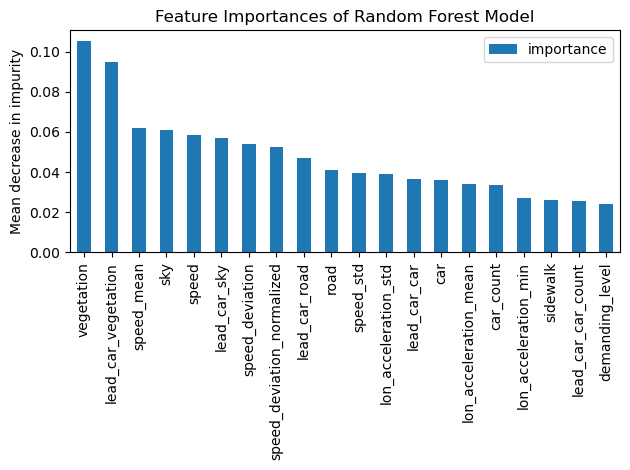

In [47]:
train_rf(data[features['oneformer'] + features['driving'] + features['index'] + ['crash_likelihood']])

n_estimators: 200
Criteria: squared_error
[[632  83  88]
 [ 56 657  68]
 [158 132 282]]
              precision    recall  f1-score   support

        High     0.7470    0.7870    0.7665       803
         Low     0.7534    0.8412    0.7949       781
      Medium     0.6438    0.4930    0.5584       572

    accuracy                         0.7287      2156
   macro avg     0.7148    0.7071    0.7066      2156
weighted avg     0.7220    0.7287    0.7216      2156

                     importance
vegetation             0.247686
lead_car_vegetation    0.154208
speed_mean             0.072499
speed_deviation        0.062617
speed                  0.054329


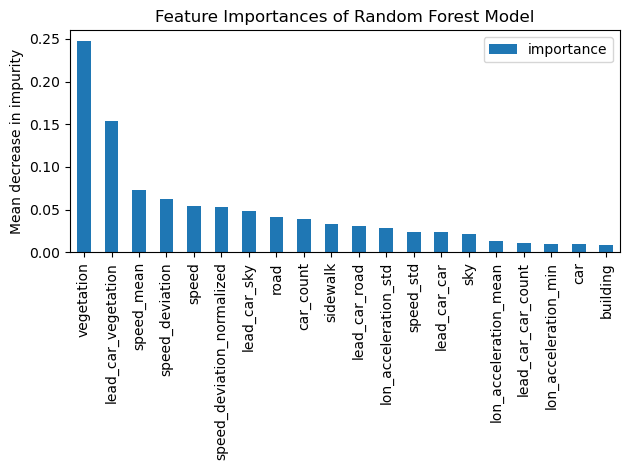

In [48]:
train_gradient_boosted(data[features['oneformer'] + features['driving'] + features['index'] + ['crash_likelihood']])

In [49]:
train_knn(data[features['oneformer'] + features['driving'] + features['index'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


n_estimators: 50
Criteria: distance
[[564 117 122]
 [ 63 611 107]
 [137 147 288]]
              precision    recall  f1-score   support

        High     0.7382    0.7024    0.7198       803
         Low     0.6983    0.7823    0.7379       781
      Medium     0.5571    0.5035    0.5289       572

    accuracy                         0.6786      2156
   macro avg     0.6645    0.6627    0.6622      2156
weighted avg     0.6757    0.6786    0.6757      2156



/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Semantic + driving

n_estimators: 200
Criteria: gini
[[838  37  78]
 [ 48 762  89]
 [124  60 511]]
              precision    recall  f1-score   support

        High       0.83      0.88      0.85       953
         Low       0.89      0.85      0.87       899
      Medium       0.75      0.74      0.74       695

    accuracy                           0.83      2547
   macro avg       0.82      0.82      0.82      2547
weighted avg       0.83      0.83      0.83      2547

                            importance
speed_mean                    0.119594
speed                         0.119051
speed_deviation_normalized    0.108986
speed_deviation               0.104069
speed_std                     0.075980


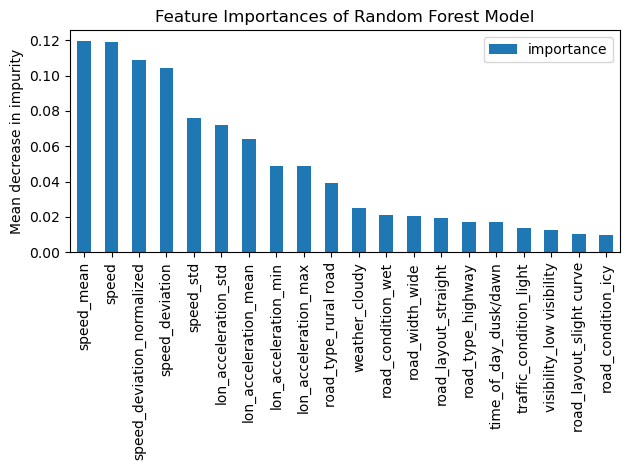

In [39]:
train_rf(data[features['semantic'] + features['driving'] + ['crash_likelihood']])

n_estimators: 200
Criteria: squared_error
[[728  75 150]
 [ 92 673 134]
 [194 108 393]]
              precision    recall  f1-score   support

        High       0.72      0.76      0.74       953
         Low       0.79      0.75      0.77       899
      Medium       0.58      0.57      0.57       695

    accuracy                           0.70      2547
   macro avg       0.69      0.69      0.69      2547
weighted avg       0.70      0.70      0.70      2547

                            importance
speed_mean                    0.165534
speed                         0.143491
speed_deviation               0.126499
road_type_rural road          0.097769
speed_deviation_normalized    0.073460


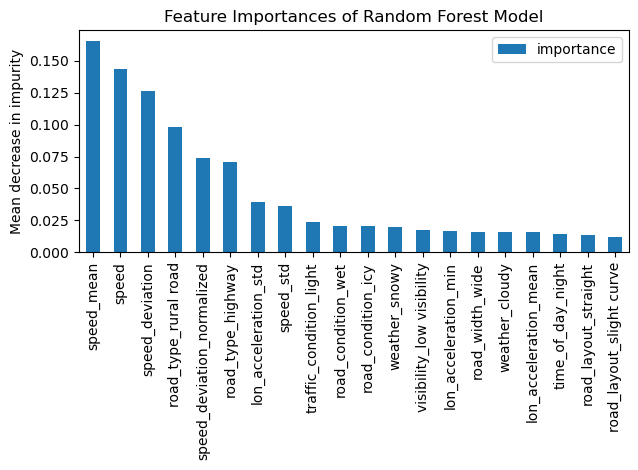

In [40]:
train_gradient_boosted(data[features['semantic'] + features['driving'] + ['crash_likelihood']])

In [41]:
train_knn(data[features['semantic'] + features['driving'] + ['crash_likelihood']])

/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/Meng/anaconda3/lib/pyth

n_estimators: 50
Criteria: distance
[[772  60 121]
 [ 69 733  97]
 [148  74 473]]
              precision    recall  f1-score   support

        High       0.78      0.81      0.80       953
         Low       0.85      0.82      0.83       899
      Medium       0.68      0.68      0.68       695

    accuracy                           0.78      2547
   macro avg       0.77      0.77      0.77      2547
weighted avg       0.78      0.78      0.78      2547



### Archive

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

def train_rf(merged_df):
    random_state = 2200
    X = merged_df.drop(['final_label'], axis=1)
    y = merged_df['final_label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

    params = [10, 20, 50, 70, 100, 150, 200]
    criterion = ['gini', 'entropy', 'log_loss']
    accuracy = 0
    for n_est in params:
        for cri in criterion:
            rfc = RandomForestClassifier(n_estimators=n_est, random_state=random_state, criterion=cri)
            rfc.fit(X_train, y_train)

            rfc_pred = rfc.predict(X_test)
            # calculate accuracy
            if np.mean(rfc_pred == y_test) > accuracy:
                accuracy = np.mean(rfc_pred == y_test)
                best_params_est, best_params_cri = n_est, cri

    # rerun the model with the highest accuracy
    rfc = RandomForestClassifier(n_estimators=best_params_est, random_state=random_state, criterion=best_params_cri)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)

    print('n_estimators:', n_est)
    print('Criteria:', best_params_cri)
    print(confusion_matrix(y_test, rfc_pred))
    print(classification_report(y_test, rfc_pred))

    # explainer = shap.TreeExplainer(rfc)
    # shap_values = explainer.shap_values(X_test)
    # shap.summary_plot(shap_values, X_test, class_names=rfc.classes_)
    # print(rfc.classes_[0])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 0], X_test)
    # print(rfc.classes_[1])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 1], X_test)
    # print(rfc.classes_[2])
    # shap.summary_plot(np.stack(shap_values, axis=-1)[:, :, 2], X_test)

    feature_importances = pd.DataFrame(rfc.feature_importances_,
                                        index = X.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
    fig, ax = plt.subplots()
    feature_importances[:20].plot.bar(ax=ax)
    ax.set_title("Feature Importances of Random Forest Model")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    print(feature_importances)
    
    X = merged_df[feature_importances.index[:len(feature_importances)//2]]
    y = merged_df['final_label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    accuracy = 0
    for n_est in params:
        for cri in criterion:
            rfc = RandomForestClassifier(n_estimators=n_est, random_state=random_state, criterion=cri)
            rfc.fit(X_train, y_train)

            rfc_pred = rfc.predict(X_test)
            # calculate accuracy
            if np.mean(rfc_pred == y_test) > accuracy:
                accuracy = np.mean(rfc_pred == y_test)
                best_params_est, best_params_cri = n_est, cri

    # rerun the model with the highest accuracy
    rfc = RandomForestClassifier(n_estimators=best_params_est, random_state=random_state, criterion=best_params_cri)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)

    print('n_estimators:', n_est)
    print('Criteria:', best_params_cri)
    print(confusion_matrix(y_test, rfc_pred))
    print(classification_report(y_test, rfc_pred))

In [3]:
data = pd.read_csv('../../0_data/1_intermediate_ML/selected_features_one_hot_data.csv')
data.columns

Index(['road', 'vegetation', 'sky', 'car', 'sidewalk', 'building',
       'lead_car_road', 'lead_car_vegetation', 'lead_car_sky', 'lead_car_car',
       'car_count', 'lead_car_car_count', 'demanding_level', 'final_label',
       'weather_cloudy', 'weather_partly cloudy', 'weather_rainy',
       'weather_sunny', 'weather_unclear', 'traffic_condition_light',
       'traffic_condition_moderate', 'time_of_day_dusk', 'time_of_day_night',
       'road_type_highway', 'road_type_parking', 'road_type_residential area',
       'road_type_rural road', 'road_width_narrow', 'road_width_wide'],
      dtype='object')

In [4]:
features = {
    'oneformer': ['road', 'vegetation', 'sky', 'car', 'sidewalk', 'building', 'lead_car_road', 'lead_car_vegetation', 
                  'lead_car_sky', 'lead_car_car', 'car_count', 'lead_car_car_count'],
    'semantic': ['weather_cloudy', 'weather_partly cloudy', 'weather_rainy',
                 'weather_sunny', 'weather_unclear', 'traffic_condition_light',
                 'traffic_condition_moderate', 'time_of_day_dusk', 'time_of_day_night',
                 'road_type_highway', 'road_type_parking', 'road_type_residential area',
                 'road_type_rural road', 'road_width_narrow', 'road_width_wide']
}

n_estimators: 200
Criteria: entropy
[[ 5  2  7]
 [ 0 36 12]
 [10 13 40]]
              precision    recall  f1-score   support

        High       0.33      0.36      0.34        14
         Low       0.71      0.75      0.73        48
      Medium       0.68      0.63      0.66        63

    accuracy                           0.65       125
   macro avg       0.57      0.58      0.58       125
weighted avg       0.65      0.65      0.65       125

                            importance
lead_car_car                  0.119940
car                           0.110311
lead_car_vegetation           0.108810
road                          0.084445
lead_car_sky                  0.077811
sky                           0.075888
lead_car_road                 0.074439
vegetation                    0.067393
car_count                     0.047751
lead_car_car_count            0.044739
sidewalk                      0.043414
building                      0.038141
weather_sunny                 0.016674


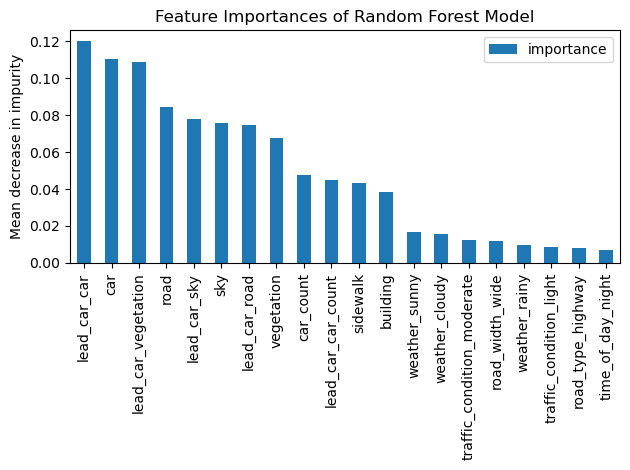

In [5]:
train_rf(data[features['oneformer'] + features['semantic'] + ['final_label']])

n_estimators: 200
Criteria: entropy
[[ 5  3  6]
 [ 0 27 21]
 [ 6 15 42]]
              precision    recall  f1-score   support

        High       0.45      0.36      0.40        14
         Low       0.60      0.56      0.58        48
      Medium       0.61      0.67      0.64        63

    accuracy                           0.59       125
   macro avg       0.55      0.53      0.54       125
weighted avg       0.59      0.59      0.59       125

                     importance
lead_car_car           0.157959
car                    0.120415
lead_car_road          0.117168
lead_car_vegetation    0.092764
road                   0.089887
vegetation             0.087124
sky                    0.077994
lead_car_sky           0.070379
car_count              0.056903
sidewalk               0.046949
lead_car_car_count     0.042681
building               0.039776
n_estimators: 200
Criteria: entropy
[[ 6  1 11]
 [ 0 27 31]
 [ 6 11 57]]
              precision    recall  f1-score   support

  

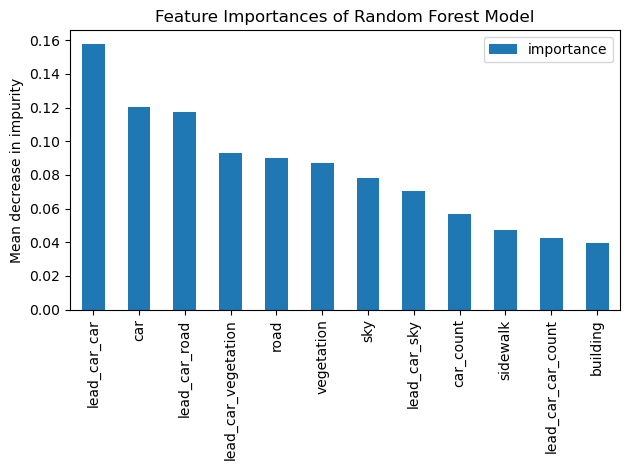

In [6]:
train_rf(data[features['oneformer'] + ['final_label']])

n_estimators: 200
Criteria: gini
[[ 6  0  8]
 [ 1 11 36]
 [ 2  9 52]]
              precision    recall  f1-score   support

        High       0.67      0.43      0.52        14
         Low       0.55      0.23      0.32        48
      Medium       0.54      0.83      0.65        63

    accuracy                           0.55       125
   macro avg       0.59      0.49      0.50       125
weighted avg       0.56      0.55      0.51       125

                            importance
weather_cloudy                0.112439
traffic_condition_light       0.108091
traffic_condition_moderate    0.102704
road_width_wide               0.087163
road_type_highway             0.084443
time_of_day_dusk              0.078289
road_type_rural road          0.077613
weather_sunny                 0.074809
road_type_residential area    0.074567
time_of_day_night             0.069138
weather_unclear               0.041588
weather_partly cloudy         0.032233
weather_rainy                 0.030606
roa

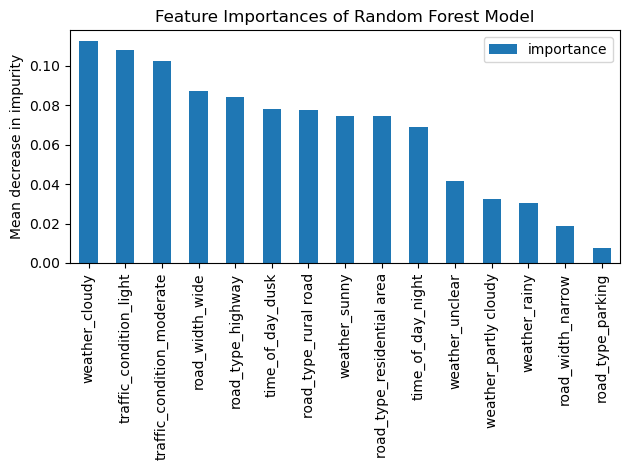

In [7]:
train_rf(data[features['semantic'] + ['final_label']])